In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
# Import dependancies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from matplotlib import pyplot as plt

# Machine learning on car collision data

In [3]:
# Load the data
file_path = Path('collision_data_ml_mc.csv')
ml_df = pd.read_csv(file_path)
ml_df

,collision_time,day_of_week,weather_1,type_of_collision,road_surface,road_cond_1,lighting,point_x,point_y,at_fault,...,vehicle_year,stwd_vehicle_type,race,victim_age,victim_sex,victim_role,safety_equip_used,victim_seating_postion,victim_ejected,severe_injury
0,2325,4,A,H,A,H,C,-118.291802,33.959881,N,...,2014,C,H,42,M,1,PW,1,1,0
1,1615,4,A,D,A,H,A,-118.445419,34.063690,N,...,2016,C,H,38,M,1,PW,1,1,0
2,1318,2,A,F,A,H,A,-117.736771,34.106918,N,...,2016,C,H,24,M,1,PW,1,0,0
3,605,2,A,A,A,H,B,-118.413193,34.240921,N,...,2018,C,H,33,M,1,PW,1,1,1
4,1730,4,A,C,A,H,C,-118.116898,33.889370,Y,...,2019,C,W,16,M,1,LW,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,1640,1,A,E,A,H,A,-118.445152,34.045036,N,...,2014,C,W,29,M,1,PW,1,1,0
1587,1425,7,A,B,A,H,A,-118.169479,33.963882,N,...,2018,C,O,52,M,1,PW,1,1,0
1588,907,3,A,B,A,H,A,-118.274483,34.032223,Y,...,2018,C,H,36,F,1,PW,1,0,0
1589,1100,7,A,F,A,H,A,-118.042152,34.285686,Y,...,2015,C,H,36,M,1,PW,1,1,1


In [4]:
ml_df = ml_df.drop(columns=[ "point_x", "point_y", "stwd_vehicle_type", "oaf_1", 
                             "victim_sex", "at_fault", "race", "party_number_killed",
                            "party_number_injured", "victim_age", "vehicle_year", "collision_time",
                           "day_of_week"])
ml_df
                   

,weather_1,type_of_collision,road_surface,road_cond_1,lighting,party_soberiety,move_pre_acc,victim_role,safety_equip_used,victim_seating_postion,victim_ejected,severe_injury
0,A,H,A,H,C,B,B,1,PW,1,1,0
1,A,D,A,H,A,A,B,1,PW,1,1,0
2,A,F,A,H,A,A,B,1,PW,1,0,0
3,A,A,A,H,B,G,B,1,PW,1,1,1
4,A,C,A,H,C,A,J,1,LW,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1586,A,E,A,H,A,A,B,1,PW,1,1,0
1587,A,B,A,H,A,A,H,1,PW,1,1,0
1588,A,B,A,H,A,A,B,1,PW,1,0,0
1589,A,F,A,H,A,A,C,1,PW,1,1,1


In [5]:
# View vehicle year data
ml_df["vehicle_year"].value_counts()

KeyError: 'vehicle_year'

In [ ]:
ml_df.dtypes[ml_df.dtypes != 'int64'][ml_df.dtypes != 'float64']

In [ ]:
# Check weather data
weather_types = ml_df["weather_1"].value_counts()
weather_types

A - Clear
B - Cloudy
C - Raining
D - Snowing
E - Fog
F - Other
G - Wind

A - (Vehicle) Code Violation
B - Other Improper Driving

In [ ]:
# Check type of collision
ml_df["type_of_collision"].value_counts()

A - Head-On
B - Sideswipe
C - Rear End
D - Broadside
E - Hit Object
F - Overturned
G - Vehicle/Pedestrian
H - Other

In [6]:
# Check sobriety factor
ml_df["party_soberiety"].value_counts()

A    1403
G      92
H      37
B      30
C      15
D      14
Name: party_soberiety, dtype: int64

A - Had not been Drinking
B - Had been Drinking, Under Influence
C - Had been Drinking, Not Under Influence
D - Had been Drinking, Impairment Unknown
G - Impairment Unknown
H - Not Applicable

A - Violation
E - Vision Obscurements
F - Inattention (beginning 1/1/01; see Inattention Item Name near end of record for A-K, P values)
G - Stop and Go Traffic
H - Entering/Leaving Ramp
I - Previous Collision
J - Unfamiliar With Road
K - Defective Vehicle Equipment
L - Uninvolved Vehicle
M - Other
N - None Apparent
O - Runaway Vehicle
P - Inattention, Cell Phone (1/1/01)
Q - Inattention, Electronic Equip.(1/1/01)
R - Inattention, Radio/CD (1/1/01)
S - Inattention, Smoking (1/1/01)
T - Inattention, Eating (1/1/01)
U - Inattention, Children (1/1/01)
V - Inattention, Animal (1/1/01)
W - Inattention, Personal Hygiene (1/1/01)
X - Inattention, Reading (1/1/01)
Y - Inattention, Other (1/1/01)
- - Not Stated

In [7]:
# Check movement pre accident factor
move_pre_acc = ml_df["move_pre_acc"].value_counts()
move_pre_acc

B    1224
E      77
A      75
I      60
H      34
J      28
R      17
M      17
C      16
D      15
L       8
N       8
Q       4
G       2
F       2
P       2
O       1
K       1
Name: move_pre_acc, dtype: int64

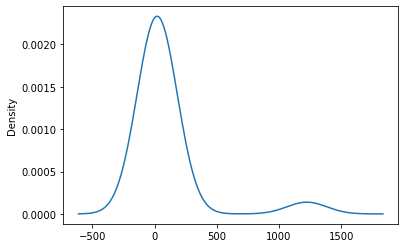

In [8]:
# Visualize the value counts of move_pre_acc
plot = move_pre_acc.plot.density()
fig = plot.get_figure()


A - Stopped
B - Proceeding Straight
C - Ran Off Road
D - Making Right Turn
E - Making Left Turn
F - Making U-Turn
G - Backing
H - Slowing/Stopping
I - Passing Other Vehicle
J - Changing Lanes
K - Parking Maneuver
L - Entering Traffic
M - Other Unsafe Turning
N - Crossed Into Opposing Lane
O - Parked
P - Merging
Q - Traveling Wrong Way
R - Other
- - Not Stated

In [9]:
# Check road type factor
road_surface = ml_df["road_surface"].value_counts()
road_surface

A    1558
B      33
Name: road_surface, dtype: int64

In [10]:
# Determine which values to replace if counts are less than ...?
replace_road_surface = list(road_surface[road_surface < 2000].index)

# Replace in dataframe
for app in replace_road_surface:
    ml_df.road_surface = ml_df.road_surface.replace(app,"slippery")
    
# Check to make sure binning was successful
ml_df.road_surface.value_counts()

slippery    1591
Name: road_surface, dtype: int64

A - Dry
B - Wet
C - Snowy or Icy
D - Slippery 

In [11]:
# Check road conditions factor
ml_df["road_cond_1"].value_counts()

H    1556
D      13
A       6
G       5
C       4
E       4
B       2
F       1
Name: road_cond_1, dtype: int64

	
A - Holes, Deep Ruts
B - Loose Material on Roadway
C - Obstruction on Roadway
D - Construction or Repair Zone
E - Reduced Roadway Width
F - Flooded
G - Other
H - No Unusual Condition

In [12]:
# Check lighting conditions factor
ml_df["lighting"].value_counts()

A    1139
C     367
B      62
D      21
E       2
Name: lighting, dtype: int64

	
A - Daylight
B - Dusk - Dawn
C - Dark - Street Lights
D - Dark - No Street Lights
E - Dark - Street Lights Not 

In [13]:
# Check safety equipment used conditions factor
pd.set_option('display.max_rows', 120)
ml_df["safety_equip_used"].value_counts()

PW    1204
GM      83
AP      46
PY      42
GL      37
MW      36
PV      33
NW      24
MP      12
BP       8
AW       7
AM       6
LW       5
PP       5
GP       4
EL       4
LM       3
BM       3
MY       3
PX       3
AN       3
PU       3
NP       2
LQ       2
CM       2
GN       2
NU       1
MX       1
FW       1
DM       1
HP       1
PQ       1
MN       1
UW       1
LP       1
Name: safety_equip_used, dtype: int64

A - None in Vehicle
B - Unknown
C - Lap Belt Used
D - Lap Belt Not Used
E - Shoulder Harness Used
F - Shoulder Harness Not Used
G - Lap/Shoulder Harness Used
H - Lap/Shoulder Harness Not Used
J - Passive Restraint Used
K - Passive Restraint Not Used
L - Air Bag Deployed
M - Air Bag Not Deployed
N - Other
P - Not Required
Q - Child Restraint in Vehicle Used
R - Child Restraint in Vehicle Not Used
S - Child Restraint in Vehicle, Use Unknown
T - Child Restraint in Vehicle, Improper Use
U - No Child Restraint in Vehicle
V - Driver, Motorcycle Helmet Not Used
W - Driver, Motorcycle Helmet Used
X - Passenger, Motorcycle Helmet Not Used
Y - Passenger, Motorcycle Helmet Used
- or blank - Not Stated AX  Z ˛z

# Machine Learning Modeling

In [14]:
# Convert strings to numeric values
from sklearn.preprocessing import LabelEncoder
ml_encoded = pd.get_dummies(ml_df, columns=["weather_1", "type_of_collision", "party_soberiety", 
                                            "move_pre_acc", "road_surface", "road_cond_1", 
                                            "lighting", "safety_equip_used"])
ml_encoded.head()

,victim_role,victim_seating_postion,victim_ejected,severe_injury,weather_1_A,weather_1_B,weather_1_C,weather_1_E,weather_1_G,type_of_collision_A,...,safety_equip_used_NU,safety_equip_used_NW,safety_equip_used_PP,safety_equip_used_PQ,safety_equip_used_PU,safety_equip_used_PV,safety_equip_used_PW,safety_equip_used_PX,safety_equip_used_PY,safety_equip_used_UW
0,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Create our features

X = ml_encoded.drop("severe_injury", axis=1)
X.head()

# Create our target
y = ml_encoded["severe_injury"]

In [16]:
# Check the balance of our target values
y.value_counts()

0    1227
1     364
Name: severe_injury, dtype: int64

In [17]:
# Create training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Determine the shape of our training and testing sets.
print(f"Training Set X", X_train.shape)
print(f"Testing Set X", X_test.shape)
print(f"Training Set y", y_train.shape)
print(f"Testing Set y", y_test.shape)

Training Set X (1193, 89)
Testing Set X (398, 89)
Training Set y (1193,)
Testing Set y (398,)


# Random Oversampler

In [18]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({1: 913, 0: 913})

In [19]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [20]:
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')

Training Score: 0.6739312657166806
Testing Score: 0.6859296482412061


In [21]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7093949044585988

In [22]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], columns=["Predicted Minor/No Injuries", "PredictedSevere/Fatality"])

cm_df

,Predicted Minor/No Injuries,PredictedSevere/Fatality
Actual Minor/No Injuries,210,104
Actual Severe/Fatality,21,63


# SMOTE Imbalanced sampling 

In [23]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({1: 913, 0: 913})

In [24]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [25]:
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')

Training Score: 0.6630343671416596
Testing Score: 0.6658291457286433


In [26]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.6835759781619655

In [27]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], 
    columns=["Predicted Minor/No Injuries", "PredictedSevere/Fatality"])

cm_df

,Predicted Minor/No Injuries,PredictedSevere/Fatality
Actual Minor/No Injuries,205,109
Actual Severe/Fatality,24,60


In [28]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.65      0.71      0.76      0.68      0.46       314
          1       0.36      0.71      0.65      0.47      0.68      0.47        84

avg / total       0.78      0.67      0.70      0.70      0.68      0.46       398



# SMOTEENN Imbalanced sampling

In [29]:
# Resample the training data with SMOTEENN
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 290, 1: 630})

In [30]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [31]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.6249241734910524

In [32]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], 
    columns=["Predicted High Risk", "Predicted Low Risk"])

cm_df

,Predicted High Risk,Predicted Low Risk
Actual Minor/No Injuries,142,172
Actual Severe/Fatality,17,67


In [33]:
# Print the imbalanced classification report
print( classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.45      0.80      0.60      0.60      0.35       314
          1       0.28      0.80      0.45      0.41      0.60      0.37        84

avg / total       0.76      0.53      0.72      0.56      0.60      0.35       398



# Balanced Random Forest Classifier

In [34]:
# Imported sklearn and imblearn dependancies
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn import datasets

In [35]:
# Creating a StandardScaler instance and fit with the training data.
scaler = StandardScaler().fit(X_train)
# Scale the X data
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1193, 89)
(398, 89)
(1193,)
(398,)


In [36]:
# Resample the training data with the BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(n_estimators = 100, random_state=1)

# Fitting the model
brf_model = brf_model.fit(X_train_scaler, y_train)

# View accuracy of models
print(f'Training Score: {brf_model.score(X_train_scaler, y_train)}')
print(f'Testing Score: {brf_model.score(X_test_scaler, y_test)}')

# Make Prediction
predictions = brf_model.predict(X_test_scaler)

Training Score: 0.7225481978206203
Testing Score: 0.6507537688442211


In [37]:
# Calculated the balanced accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.6507537688442211

In [38]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], 
    columns=["Predicted Minor/No Injuries", "PredictedSevere/Fatality"])
cm_df


,Predicted Minor/No Injuries,PredictedSevere/Fatality
Actual Minor/No Injuries,196,118
Actual Severe/Fatality,21,63


In [39]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.62      0.75      0.74      0.68      0.46       314
          1       0.35      0.75      0.62      0.48      0.68      0.47        84

avg / total       0.79      0.65      0.72      0.68      0.68      0.46       398



In [40]:
# List the features sorted in descending order by feature importance
ranked_importances = brf_model.feature_importances_


In [41]:
# Create dataframe with X data for ranked importance columns
ml_encoded_X = ml_encoded.drop("severe_injury", axis=1)
ml_encoded_X

,victim_role,victim_seating_postion,victim_ejected,weather_1_A,weather_1_B,weather_1_C,weather_1_E,weather_1_G,type_of_collision_A,type_of_collision_B,...,safety_equip_used_NU,safety_equip_used_NW,safety_equip_used_PP,safety_equip_used_PQ,safety_equip_used_PU,safety_equip_used_PV,safety_equip_used_PW,safety_equip_used_PX,safety_equip_used_PY,safety_equip_used_UW
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1587,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1588,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1589,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [42]:
# Create dataframe containing ranked and sorted feature importances
ranked_importances = sorted(zip(brf_model.feature_importances_, ml_encoded_X.columns), reverse=True)
ranked_importances

[(0.1608187344312244, 'victim_ejected'),
 (0.061473868964426644, 'party_soberiety_A'),
 (0.05896792008415927, 'party_soberiety_G'),
 (0.040407046360872785, 'safety_equip_used_PW'),
 (0.03945039824943886, 'victim_seating_postion'),
 (0.03686122514191512, 'move_pre_acc_B'),
 (0.034979915032869034, 'type_of_collision_D'),
 (0.03215102566587621, 'type_of_collision_B'),
 (0.029834790873759353, 'lighting_A'),
 (0.029718744145331318, 'lighting_C'),
 (0.027632274451049904, 'type_of_collision_C'),
 (0.023011899672896123, 'type_of_collision_A'),
 (0.021143422555347437, 'weather_1_A'),
 (0.02070892927686606, 'type_of_collision_E'),
 (0.018573526385496822, 'safety_equip_used_GM'),
 (0.018171749859547358, 'weather_1_B'),
 (0.016474242037558314, 'move_pre_acc_I'),
 (0.016197924045347097, 'move_pre_acc_A'),
 (0.015763162065243214, 'move_pre_acc_E'),
 (0.015681504234605702, 'type_of_collision_H'),
 (0.015035875510149913, 'party_soberiety_H'),
 (0.014843577724452772, 'type_of_collision_F'),
 (0.0148080

In [43]:
# Create dataframe containing ranked and sorted feature importances
ranked_importances_df = pd.DataFrame(sorted(ranked_importances, reverse=True), columns=["Importance", "Feature"])
ranked_importances_df

,Importance,Feature
0,0.160819,victim_ejected
1,0.061474,party_soberiety_A
2,0.058968,party_soberiety_G
3,0.040407,safety_equip_used_PW
4,0.039450,victim_seating_postion
5,0.036861,move_pre_acc_B
6,0.034980,type_of_collision_D
7,0.032151,type_of_collision_B
8,0.029835,lighting_A
9,0.029719,lighting_C


<Figure size 1440x720 with 0 Axes>

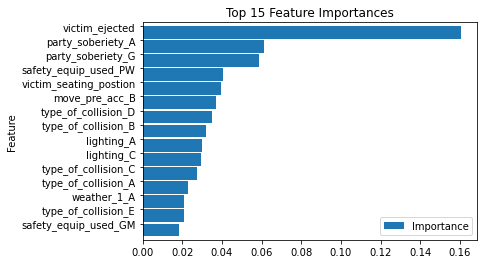

In [44]:
# Visualize top 10 feature importances
top_importances_df = ranked_importances_df.head(15)

plt.figure(figsize=(20,10))
top_importances_df.plot.barh(x="Feature", y="Importance", align='edge', width=0.9,
                      title="Top 15 Feature Importances",
                           ylabel="% Importance")
plt.gca().invert_yaxis()
plt.show
plt.savefig('topfeatureranking.png')


In [45]:
# Show count of total estimators in Balanced Random Forest Classifier
print(len(brf_model.estimators_))

100


# Easy Ensemble Classifier

In [46]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier
eec = EasyEnsembleClassifier(n_estimators=100, random_state=1)
eec.fit(X_train_scaler, y_train)

# View accuracy of models
print(f'Training Score: {eec.score(X_train_scaler, y_train)}')
print(f'Testing Score: {eec.score(X_test_scaler, y_test)}')


predictions = eec.predict(X_test_scaler)

Training Score: 0.6680637049455155
Testing Score: 0.6608040201005025


In [47]:
# Calculated the balanced accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.6608040201005025

In [48]:
# Display the confusion matrix
y_pred = eec.predict(X_test_scaler)
cm = confusion_matrix(y_test, y_pred)

In [49]:
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Low Injury", "Actual High Injury"], columns=["Predicted Minor/No Injuries", "PredictedSevere/Fatality"])

cm_df


,Predicted Minor/No Injuries,PredictedSevere/Fatality
Actual Low Injury,201,113
Actual High Injury,22,62


In [50]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.64      0.74      0.75      0.69      0.47       314
          1       0.35      0.74      0.64      0.48      0.69      0.48        84

avg / total       0.79      0.66      0.72      0.69      0.69      0.47       398

